# The Steepest Descent

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.io

def steepest_descent(A, b, x0=None, tol=1e-6, max_iter=100000):
    if x0 is None:
        x = np.zeros_like(b, dtype=float)
    else:
        x = x0.astype(float)
    r = b - A @ x
    k = 0
    residuals = [np.linalg.norm(r)]  
    while residuals[-1] > tol and k < max_iter:
        Ar = A @ r
        rr, rAr = np.dot(r, r), np.dot(r, Ar)
        if rAr == 0:
            print("Error: Division by zero")
            break
        
        a_k = rr / rAr
        x_new = x + a_k * r
        r_new = r - a_k * Ar

        x, r = x_new, r_new
        residuals.append(np.linalg.norm(r))  # Track residual norm
        k += 1

    # Check for convergence
    if residuals[-1] <= tol:
        print(f"Converged after {k} iterations")
    else:
        print(f"Reached maximum iterations ({max_iter}) without full convergence")
    
    return x, k, residuals

##### Data Importation

In [2]:
A = scipy.io.loadmat('C:/Users/DELL/Downloads/A66.mat')['Ast'].toarray()
X = np.ones(A.shape[0], dtype = float)
b = A@X

##### Testing the code

In [3]:
start_time = time.time()
solution, iterations, residuals = steepest_descent(A, b)
print("Final Solution:", solution)
print("Total Iterations:", iterations)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Converged after 5236 iterations
Final Solution: [1. 1. 1. ... 1. 1. 1.]
Total Iterations: 5236
Elapsed time: 289.11341285705566 seconds


#### Plot of residuals over number of iterations

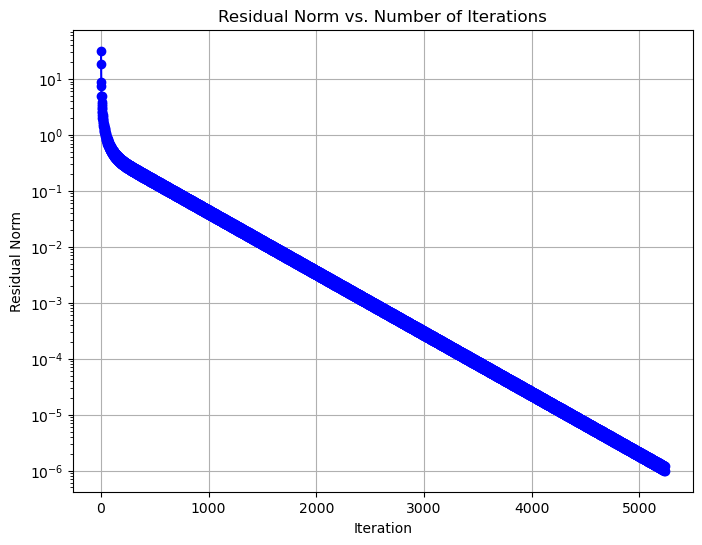

In [4]:
# Plot residuals against iterations
k = iterations
plt.figure(figsize=(8, 6))
plt.plot(range(k + 1), residuals, marker='o', color='b')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual Norm vs. Number of Iterations")
plt.yscale("log")  
plt.grid(True)
plt.show()

# The Conjugate Gradient

In [5]:
def conjugate_gradient(A, b, tol=1e-6):
    n = A.shape[0]
    max_iter = n
    x = np.zeros(n, dtype=float)
    r = b - A @ x
    p = r.copy()
    residuals = [np.linalg.norm(r)]
    
    for k in range(max_iter):
        Ap = A @ p
        r_dot = np.dot(r, r)
        alpha = r_dot / np.dot(p, Ap)

        x = x + alpha * p
        r_new = r - alpha * Ap
        residuals.append(np.linalg.norm(r_new))  # Track residual norm

        # Check for convergence
        if residuals[-1] < tol:
            return x, k + 1, residuals

        beta = np.dot(r_new, r_new) / r_dot
        p = r_new + beta * p
        r = r_new

    return x, max_iter, residuals



#### Testing the code for Congugate Gradient

In [6]:
start_time = time.time()
solution, iterations, residuals = conjugate_gradient(A, b)
print("Final Solution:", solution)
print("Total Iterations:", iterations)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Final Solution: [1. 1. 1. ... 1. 1. 1.]
Total Iterations: 80
Elapsed time: 3.967383861541748 seconds


#### Plot of residuals over number of iterations

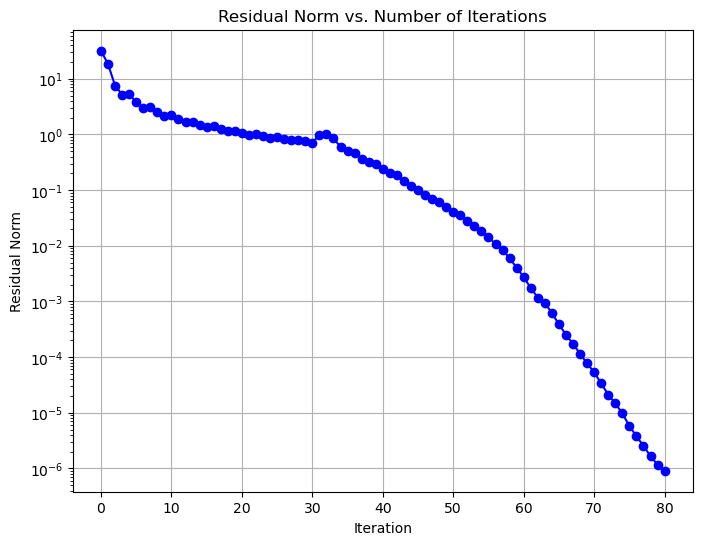

In [7]:
# Plot residuals
plt.figure(figsize=(8, 6))
k = iterations
plt.plot(range(k + 1), residuals, marker='o', color='b')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual Norm vs. Number of Iterations")
plt.yscale("log")  # Log scale for better visualization
plt.grid(True)
plt.show()

In [8]:
from scipy.sparse.linalg import cg

start_time = time.time()
x, info = cg(A, b)

print("Solution x:", x)
print("Info:", info)  # info gives convergence information (0 means successful convergence)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Solution x: [0.99999977 0.99999977 0.99999977 ... 0.99999977 0.99999977 0.99999977]
Info: 0
Elapsed time: 4.0572755336761475 seconds


## Arnordi Iteration Method

In [11]:
def Arnoldi(b, A, k,tol = 1e-6):
    n = b.shape[0]
    H = np.zeros((k+1, k))
    V = np.zeros((n, k+1))
    V[:,0] = b / np.linalg.norm(b)
    
    for j in range(k):
        V[:,j+1] = A  @ V[:,j]
        for i in range(j+1):
            H[i, j] = np.dot(V[:,i].conj(), V[:,j+1])
            V[:,j+1] -= H[i,j] * V[:,i]
        H[j+1,j] = np.linalg.norm(V[:,j+1])
        if H[j+1, j] < tol:
            return H[:j+1, :j+1], V[:,:j+1]
                
        V[:, j+1] /= H[j+1, j]
    return H[:-1, :], V

In [12]:
k = 120
start_time = time.time()
H, V = Arnoldi(b, A, k)
print("H:\n", H)
print(" V:\n", V)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

H:
 [[ 1.49623188e+00  8.62047503e-01 -7.90998120e-15 ...  4.78291829e-03
  -2.22715483e-03  1.11891026e-03]
 [ 8.62047503e-01  2.49447795e+00  8.15726724e-01 ...  1.22037151e-02
  -5.68263167e-03  2.85492271e-03]
 [ 0.00000000e+00  8.15726724e-01  1.99538328e+00 ...  8.22964406e-03
  -3.83211470e-03  1.92523322e-03]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.18332024e+00
   8.62949854e-01  3.10755191e-14]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.62949854e-01
   2.28507402e+00  8.59581883e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   8.59581883e-01  2.17374649e+00]]
 V:
 [[ 3.12771621e-02 -1.80044893e-02 -6.75313325e-05 ...  6.90894737e-05
  -3.14517284e-04  3.66334051e-04]
 [ 3.12771621e-02 -1.80044893e-02 -6.75313325e-05 ...  6.90894737e-05
  -3.14517284e-04  3.66334051e-04]
 [ 3.12771621e-02 -1.80044893e-02 -6.75313325e-05 ...  6.90894737e-05
  -3.14517284e-04  3.66334051e-04]
 ...
 [ 3.12771621e-02 -1.80044893e-02 -

## Full Orthogonalisation Method

In [13]:
def FOM(A, b, x0, m, tol=1e-6):
    n = A.shape[0]
    H = np.zeros((m + 1, m))
    V = np.zeros((n, m + 1))

    # Initial residual and vector v1
    r0 = b - A @ x0
    beta = np.linalg.norm(r0)
    V[:, 0] = r0 / beta

    residuals = [np.linalg.norm(r0)]
    start_time = time.time()
    num_iterations = 0 
    
    # Arnoldi iteration
    for j in range(m):
        num_iterations += 1 
        w = A @ V[:, j]
        
        for i in range(j + 1):
            H[i, j] = np.dot(w, V[:, i]) 
            w -= H[i, j] * V[:, i]     
        
        H[j + 1, j] = np.linalg.norm(w)
        
        # Check for breakdown (convergence)
        if H[j + 1, j] < tol:
            print(f"Converged early at iteration {j+1}.")
            H_final = H[:j + 1, :j + 1]
            V_final = V[:, :j + 1]
            break
        else:
            V[:, j + 1] = w / H[j + 1, j] 
            residual = np.linalg.norm(b - A @ (x0 + V[:, :j+1] @ np.linalg.solve(H[:j+1, :j+1], beta * np.eye(j+1)[:,0])))
            residuals.append(residual)
    else:
        H_final = H[:-1, :]
        V_final = V[:, :m]
    e1 = np.zeros(H_final.shape[0])
    e1[0] = beta
    
    y_m = np.linalg.solve(H_final, e1) 
    xm = x0 + V_final @ y_m             

    return xm, residuals, num_iterations



#### Testing the code

In [14]:
start_time = time.time()
m=105
x0 = np.zeros_like(b)
xm, res, iters = FOM(A, b, x0, m)
print("Final Solution:", xm)
print("Total Iterations:", iters)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Final Solution: [1. 1. 1. ... 1. 1. 1.]
Total Iterations: 105
Elapsed time: 12.904454708099365 seconds


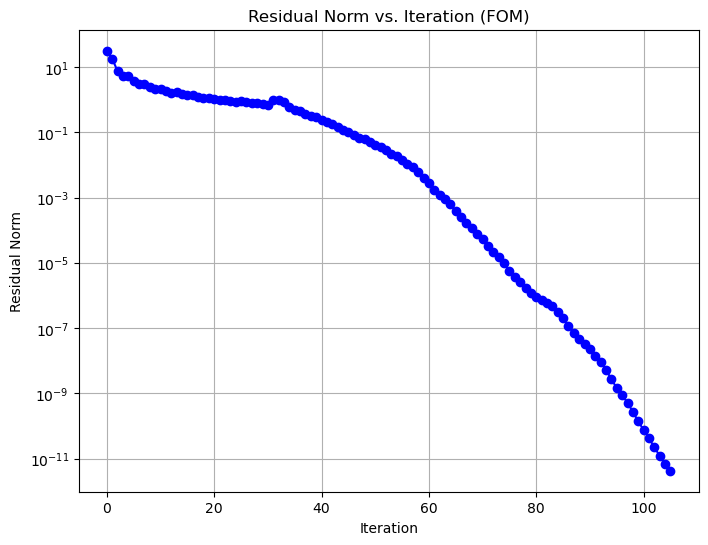

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(iters+1), res, marker='o', color='b')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual Norm vs. Iteration (FOM)")
plt.yscale("log")
plt.grid(True)
plt.show()

### GMRES

In [16]:
def gmres(A, b, x0, m, tol=1e-6):
    r0 = b - A @ x0
    beta = np.linalg.norm(r0, 2)
    v1 = r0 / beta
    V = [v1]  
    H = np.zeros((m+1, m)) 

    for j in range(m):
        w = A @ V[j]
        for i in range(j + 1):
            H[i, j] = np.dot(w, V[i])
            w -= H[i, j] * V[i]
    
        H[j+1, j] = np.linalg.norm(w, 2)
        
        if H[j+1, j] == 0:
            break
        
        V.append(w / H[j+1, j])

    V = np.column_stack(V)  
    e1 = np.zeros(m+1)
    e1[0] = beta
    y_m, _, _, _ = np.linalg.lstsq(H[:j+1, :j+1], e1[:j+1], rcond=None)
    
    x_m = x0 + V[:, :j+1] @ y_m
    r_m = b - A @ x_m
    if np.linalg.norm(r_m, 2) <= tol:
        return x_m, y_m
    x0 = x_m
    return x_m, ym

In [17]:
A = np.array([[4, 1], [1, 3]], dtype=float)
b = np.array([1, 2], dtype=float)
x0 = np.zeros(b.shape[0])
m = 2


gmres(A, b, x0, m)


(array([0.09090909, 0.63636364]), array([ 0.60983672, -0.20327891]))

In [18]:
import numpy as np

# Example input
A = np.array([[4, 1], [1, 3]])  # Square matrix A
b = np.array([1, 2])  # Right-hand side vector b

# Solve the system Ax = b
x = np.linalg.solve(A, b)

print("Solution x:", x)


Solution x: [0.09090909 0.63636364]


## Lanczos Iteration


In [19]:
def Lanczos(b, A, k, tol=1e-6):
    n = A.shape[0]
    v1 = b/np.linalg.norm(b)
    V = np.zeros((n, k+1))
    alphas = np.zeros(k)
    betas = np.zeros(k+1)
    V[:,0] = v1
    beta = 0
    v = np.zeros(n)
    for i in range(k):
        w = A @ V[:,i] - beta * v
        alpha = np.dot(w, V[:,i])
        alphas[i] = alpha
        w -= alpha*V[:,i]
        beta = np.linalg.norm(w)
        betas[i+1] = beta
        if beta < tol:
            print(f"Early termination at iteratin {i+1}")
            break
        V[:,i+1] = w / beta
        v = V[:,i]
    return alphas[:i+1], betas[:i+2], V[:,:i+2]

In [20]:

A = np.array([[4, 1], [1, 3]], dtype=float)
b = np.array([1, 0], dtype=float)
k = 10  # Maximum number of iterations

# Run the Lanczos algorithm
alphas, betas, V = Lanczos(b,A, k)

# Output results
print("Alphas:", alphas)
print("Betas:", betas)
print("Orthogonal Basis Vectors (V):\n", V)

Early termination at iteratin 2
Alphas: [4. 3.]
Betas: [0. 1. 0.]
Orthogonal Basis Vectors (V):
 [[1. 0. 0.]
 [0. 1. 0.]]
